In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image=files.upload()

Saving Aayush1.jpg to Aayush1.jpg


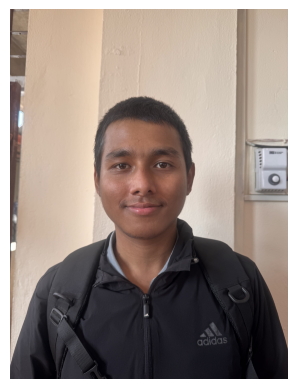

In [ ]:
filename = list(image.keys())[0]

img = Image.open(filename)
plt.imshow(img)
plt.axis("off")
img.show()

In [ ]:
org_img=np.array(img)
org_img.shape

(5712, 4284, 3)

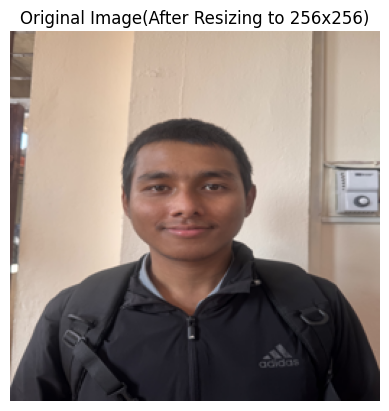

In [ ]:
img_resized=img.resize((256,256))
plt.imshow(img_resized)
plt.axis("off")
plt.title("Original Image(After Resizing to 256x256)")
img.show()

In [ ]:
img_array=np.array(img_resized)
img_array.shape

(256, 256, 3)

In [ ]:
#channel splitting

R = img_array[:, :, 0]
G = img_array[:, :, 1]
B = img_array[:, :, 2]


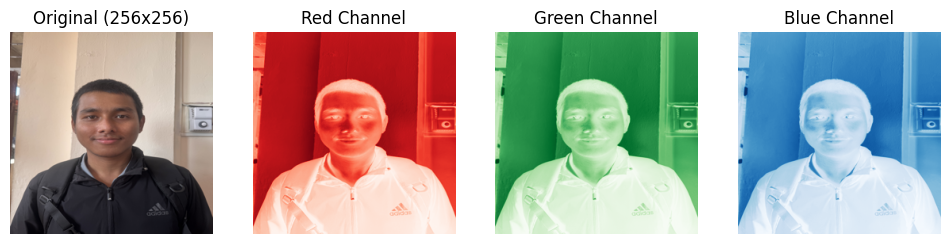

In [ ]:
#Image across RGB Channel Plot
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(img_resized)
axes[0].set_title("Original (256x256)")
axes[1].imshow(R, cmap="Reds")
axes[1].set_title("Red Channel")
axes[2].imshow(G, cmap="Greens")
axes[2].set_title("Green Channel")
axes[3].imshow(B, cmap="Blues")
axes[3].set_title("Blue Channel")

for ax in axes:
  ax.axis("off")

plt.show()

In [ ]:
import numpy as np

channels= {'Red': R, 'Green': G, 'Blue': B}

means = {}
centered = {}

for channel_name, channel_data in channels.items():
    channel_float = channel_data.astype(np.float32)
    channel_mean = np.mean(channel_float, axis=0)  # mean per column/feature
    channel_centered = channel_float - channel_mean

    means[channel_name] = channel_mean
    centered[channel_name] = channel_centered


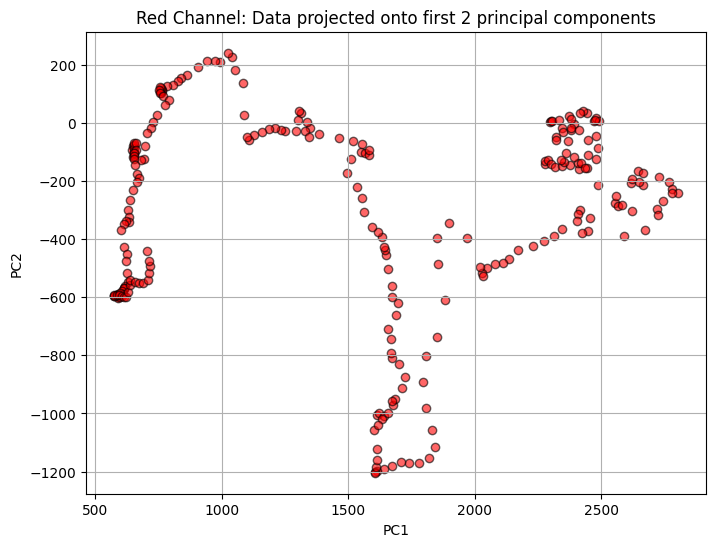

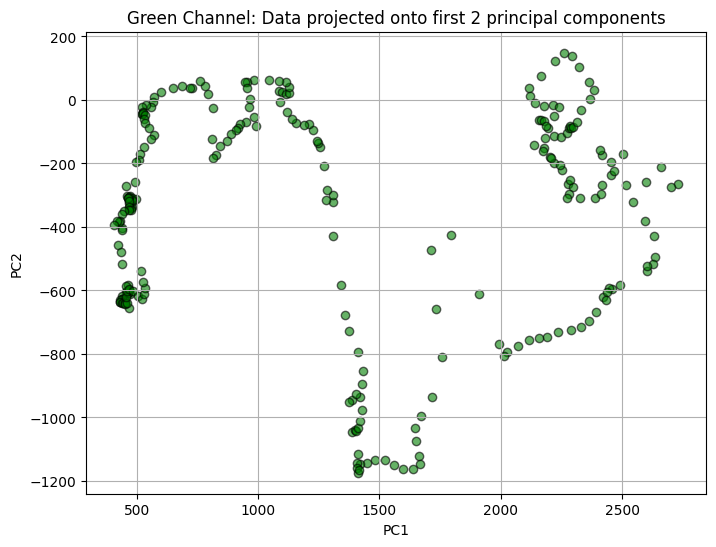

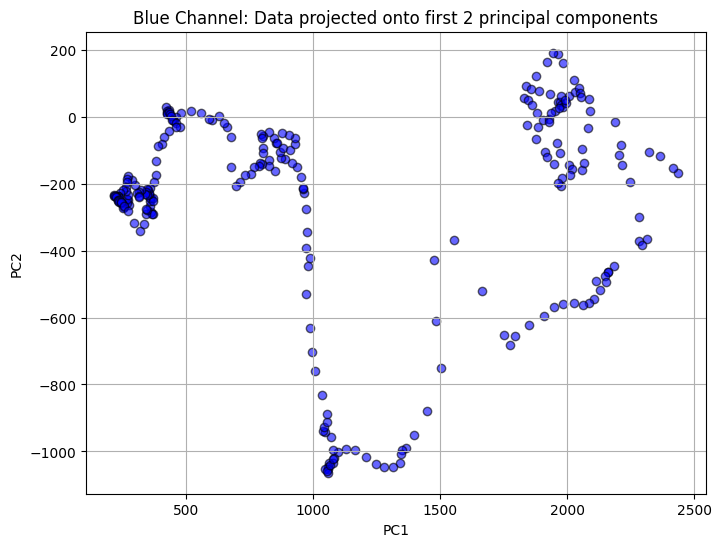

In [ ]:
cov_matrix = {}
eig_vals_dict = {}
eig_vecs_dict = {}

colors = {'Red': 'red', 'Green': 'green', 'Blue': 'blue'}

for channel_name, channel_data in channels.items():
    cov = np.cov(channel_data, rowvar=False)
    cov_matrix[channel_name] = cov

    vals, vecs = np.linalg.eigh(cov)
    sorted_indices = np.argsort(vals)[::-1]
    vals_sorted = vals[sorted_indices]
    vecs_sorted = vecs[:, sorted_indices]

    eig_vals_dict[channel_name] = vals_sorted
    eig_vecs_dict[channel_name] = vecs_sorted

    PC1 = channel_data @ vecs_sorted[:, 0]
    PC2 = channel_data @ vecs_sorted[:, 1]

    plt.figure(figsize=(8,6))
    plt.scatter(PC1, PC2, c=colors[channel_name], alpha=0.6, edgecolor='k')
    plt.title(f"{channel_name} Channel: Data projected onto first 2 principal components")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()


In [ ]:
num_components = 50

In [ ]:
red_eig_vecs=eig_vecs_dict['Red']
R_centered=centered['Red']
R_mean=means['Red']
top_eig_vecs = red_eig_vecs[:, :num_components]  # shape: features × num_components

# Project data (samples × features) onto PCs
R_pca = np.dot(R_centered, top_eig_vecs)  # Result shape: samples × num_components

print("Shape of projected data:", R_pca.shape)


Shape of projected data: (256, 50)


In [ ]:
# Reconstruct the data (samples × features)
R_reconstructed = np.dot(R_pca, top_eig_vecs.T) + R_mean

print("Shape of reconstructed data:", R_reconstructed.shape)


Shape of reconstructed data: (256, 256)


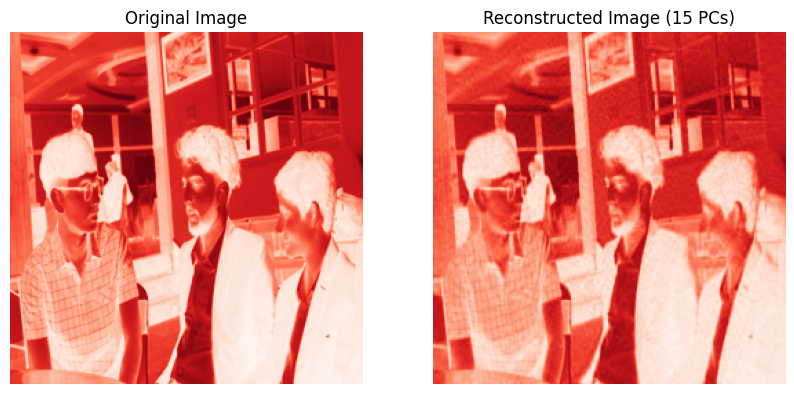

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Original
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(R,'Reds')
plt.axis('off')

# Reconstructed
plt.subplot(1,2,2)
plt.title("Reconstructed Image (15 PCs)")
plt.imshow(R_reconstructed, cmap='Reds')
plt.axis('off')

plt.show()


In [ ]:

eig_vecs_G=eig_vecs_dict['Green']
G_centered=centered['Green']
G_mean=means['Green']
top_eig_vecs_G = eig_vecs_G[:, :num_components]

# Project
G_pca = np.dot(G_centered, top_eig_vecs_G)

# Reconstruct
G_reconstructed = np.dot(G_pca, top_eig_vecs_G.T) + G_mean


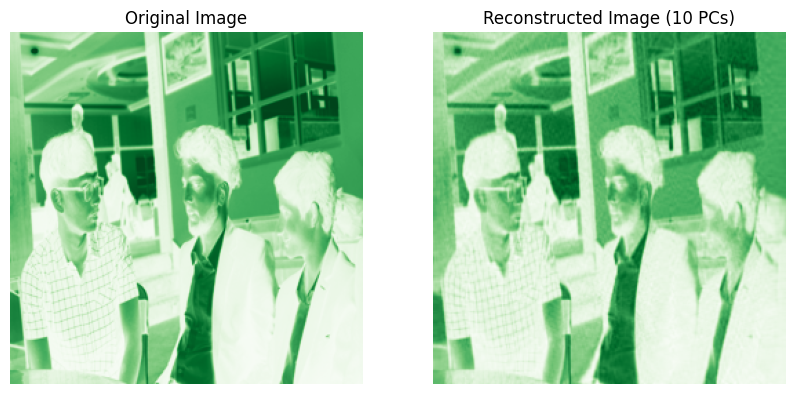

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Original
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(G,'Greens')
plt.axis('off')

# Reconstructed
plt.subplot(1,2,2)
plt.title("Reconstructed Image (10 PCs)")
plt.imshow(G_reconstructed, cmap='Greens')
plt.axis('off')

plt.show()


In [ ]:
eig_vecs_B=eig_vecs_dict['Blue']
B_centered=centered['Blue']
B_mean=means['Blue']
top_eig_vecs_B = eig_vecs_B[:, :num_components]

# Project
B_pca = np.dot(B_centered, top_eig_vecs_B)

# Reconstruct
B_reconstructed = np.dot(B_pca, top_eig_vecs_B.T) + B_mean


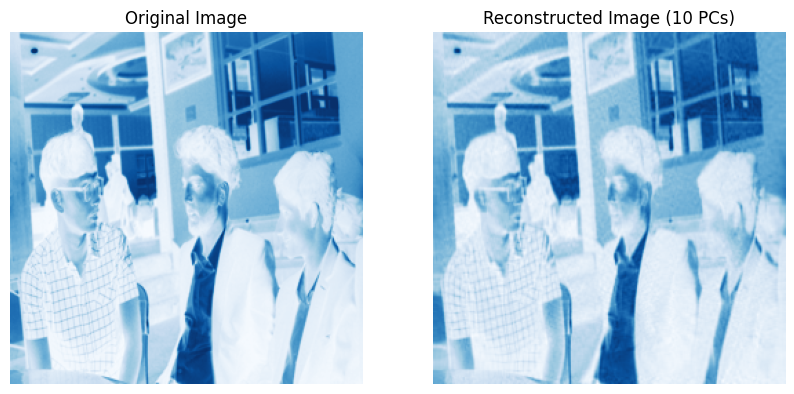

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Original
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(B,'Blues')
plt.axis('off')

# Reconstructed
plt.subplot(1,2,2)
plt.title("Reconstructed Image (10 PCs)")
plt.imshow(B_reconstructed, cmap='Blues')
plt.axis('off')

plt.show()


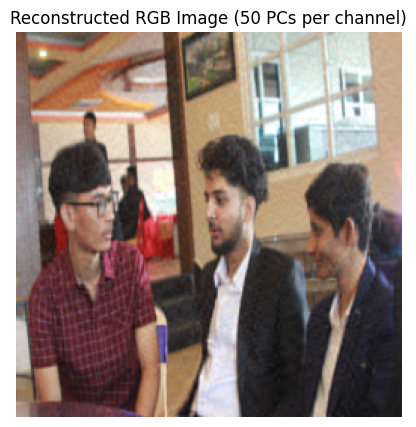

In [ ]:
reconstructed_img = np.stack([R_reconstructed, G_reconstructed, B_reconstructed], axis=2)

#reconstruction of the image
reconstructed_img = np.clip(reconstructed_img, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.title("Reconstructed RGB Image (50 PCs per channel)")
plt.imshow(reconstructed_img)
plt.axis('off')
plt.show()



=== PCA Analysis Results (Reconstructed Image) ===

Channel: Red
  Original dimensions: 256
  Reduced dimensions: 50
  Compression ratio: 5.1:1
  Space reduction: 80.5%
  Components for 90% variance: 10
  Components for 95% variance: 18

Channel: Green
  Original dimensions: 256
  Reduced dimensions: 50
  Compression ratio: 5.1:1
  Space reduction: 80.5%
  Components for 90% variance: 9
  Components for 95% variance: 16

Channel: Blue
  Original dimensions: 256
  Reduced dimensions: 50
  Compression ratio: 5.1:1
  Space reduction: 80.5%
  Components for 90% variance: 9
  Components for 95% variance: 17


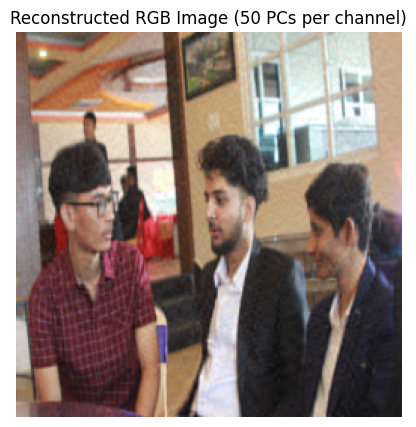

In [ ]:
num_components = 50

print("\n=== PCA Analysis Results (Reconstructed Image) ===")
for channel_name in ['Red', 'Green', 'Blue']:
    original_dim = centered[channel_name].shape[1]
    reduced_dim = num_components
    compression_ratio = original_dim / reduced_dim

    explained_variance = eig_vals_dict[channel_name] / np.sum(eig_vals_dict[channel_name])
    cumulative_variance = np.cumsum(explained_variance)
    comp_90 = np.argmax(cumulative_variance >= 0.90) + 1
    comp_95 = np.argmax(cumulative_variance >= 0.95) + 1

    print(f"\nChannel: {channel_name}")
    print(f"  Original dimensions: {original_dim}")
    print(f"  Reduced dimensions: {reduced_dim}")
    print(f"  Compression ratio: {compression_ratio:.1f}:1")
    print(f"  Space reduction: {(1 - reduced_dim/original_dim) * 100:.1f}%")
    print(f"  Components for 90% variance: {comp_90}")
    print(f"  Components for 95% variance: {comp_95}")

# Show reconstructed image
plt.figure(figsize=(10,5))
plt.title(f"Reconstructed RGB Image ({num_components} PCs per channel)")
plt.imshow(reconstructed_img)
plt.axis('off')
plt.show()


##**RECONSTRUCTION LOSS**


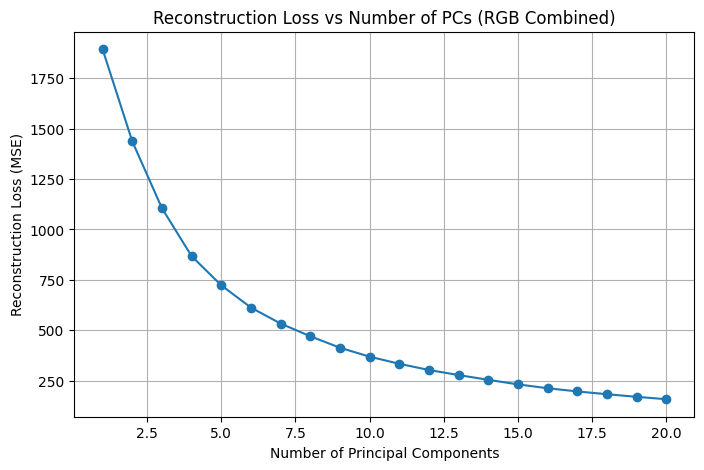

In [ ]:
def reconstruction_loss(original_img, reconstructed_img):
    return np.mean((original_img - reconstructed_img) ** 2)

pcs_range = range(1, 21)
losses_rgb = []

for n_components in pcs_range:
    recon_channels = []

    for channel_name in ['Red', 'Green', 'Blue']:
        top_eig_vecs = eig_vecs_dict[channel_name][:, :n_components]
        channel_centered = centered[channel_name]
        channel_mean = means[channel_name]

        # Project onto top PCs
        channel_pca = np.dot(channel_centered, top_eig_vecs)

        # Reconstruct from projection and add the mean back
        channel_recon = np.dot(channel_pca, top_eig_vecs.T) + channel_mean

        recon_channels.append(channel_recon)

    # Stack reconstructed channels into one image array: samples × features × 3
    recon_img = np.stack(recon_channels, axis=2)

    # Calculate reconstruction loss against original image
    loss = reconstruction_loss(img_array, recon_img)
    losses_rgb.append(loss)

# Plot the loss curve
plt.figure(figsize=(8,5))
plt.plot(pcs_range, losses_rgb, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Reconstruction Loss (MSE)")
plt.title("Reconstruction Loss vs Number of PCs (RGB Combined)")
plt.grid(True)
plt.show()


##**OUTPUTS**

In [ ]:
output_images=files.upload()

Saving IMG_0173.JPG to IMG_0173 (1).JPG


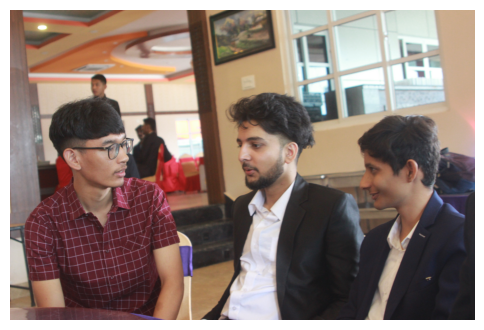

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image



for image in output_images:
    img = Image.open(image)
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()